<a href="https://colab.research.google.com/github/DanRivaille/GeneticAlgorithm-Comparisons/blob/master/AlgoritmoGenetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matrices de distancias

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [ ]:
tsp_17 = {
"TourSize" : 17,
"OptTourKnow" : [15, 11, 8, 4, 1, 9, 10, 2, 14, 13, 16, 5, 7, 6, 12, 3, 0],
"OptDistanceKnow" : 2085,
"DistanceMatrix" :
    [[0, 633, 257, 91, 412, 150, 80, 134, 259, 505, 353, 324, 70, 211, 268, 246, 121],
    [633, 0, 390, 661, 227, 488, 572, 530, 555, 289, 282, 638, 567, 466, 420, 745, 518],
    [257, 390, 0, 228, 169, 112, 196, 154, 372, 262, 110, 437, 191, 74, 53, 472, 142],
    [91, 661, 228, 0, 383, 120, 77, 105, 175, 476, 324, 240, 27, 182, 239, 237, 84],
    [412, 227, 169, 383, 0, 267, 351, 309, 338, 196, 61, 421, 346, 243, 199, 528, 297],
    [150, 488, 112, 120, 267, 0, 63, 34, 264, 360, 208, 329, 83, 105, 123, 364, 35],
    [80, 572, 196, 77, 351, 63, 0, 29, 232, 444, 292, 297, 47, 150, 207, 332, 29],
    [134, 530, 154, 105, 309, 34, 29, 0, 249, 402, 250, 314, 68, 108, 165, 349, 36],
    [259, 555, 372, 175, 338, 264, 232, 249, 0, 495, 352, 95, 189, 326, 383, 202, 236],
    [505, 289, 262, 476, 196, 360, 444, 402, 495, 0, 154, 578, 439, 336, 240, 685, 390],
    [353, 282, 110, 324, 61, 208, 292, 250, 352, 154, 0, 435, 287, 184, 140, 542, 238],
    [324, 638, 437, 240, 421, 329, 297, 314, 95, 578, 435, 0, 254, 391, 448, 157, 301],
    [70, 567, 191, 27, 346, 83, 47, 68, 189, 439, 287, 254, 0, 145, 202, 289, 55],
    [211, 466, 74, 182, 243, 105, 150, 108, 326, 336, 184, 391, 145, 0, 57, 426, 96],
    [268, 420, 53, 239, 199, 123, 207, 165, 383, 240, 140, 448, 202, 57, 0, 483, 153],
    [246, 745, 472, 237, 528, 364, 332, 349, 202, 685, 542, 157, 289, 426, 483, 0, 336],
    [121, 518, 142, 84, 297, 35, 29, 36, 236, 390, 238, 301, 55, 96, 153, 336, 0]]
}

In [ ]:
tsp_13 = {
"TourSize" : 13,
"OptTourKnow" : [3, 2, 7, 0, 9, 5, 10, 11, 1, 8, 6, 12, 4],
"OptDistanceKnow" : 7293,
"DistanceMatrix" :
    [[0, 2451,  713, 1018, 1631, 1374, 2408,  213, 2571,  875, 1420, 2145, 1972],
     [2451,    0, 1745, 1524,  831, 1240,  959, 2596,  403, 1589, 1374,  357,  579],
     [713, 1745,    0,  355,  920,  803, 1737,  851, 1858,  262,  940, 1453, 1260],
     [1018, 1524,  355,    0,  700,  862, 1395, 1123, 1584,  466, 1056, 1280,  987],
     [1631,  831,  920,  700,    0,  663, 1021, 1769,  949,  796,  879,  586,  371],
     [1374, 1240,  803,  862,  663,    0, 1681, 1551, 1765,  547,  225,  887,  999],
     [2408,  959, 1737, 1395, 1021, 1681,    0, 2493,  678, 1724, 1891, 1114,  701],
     [213, 2596,  851, 1123, 1769, 1551, 2493,    0, 2699, 1038, 1605, 2300, 2099],
     [2571,  403, 1858, 1584,  949, 1765,  678, 2699,    0, 1744, 1645,  653,  600],
     [875, 1589,  262,  466,  796,  547, 1724, 1038, 1744,    0,  679, 1272, 1162],
     [1420, 1374,  940, 1056,  879,  225, 1891, 1605, 1645,  679,    0, 1017, 1200],
     [2145,  357, 1453, 1280,  586,  887, 1114, 2300,  653, 1272, 1017,    0,  504],
     [1972,  579, 1260,  987,  371,  999,  701, 2099,  600, 1162, 1200,  504,    0]]
}

In [ ]:
tsp_13['DistanceMatrix'][0]

[0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972]

## Configuracion de las variables del problema

In [ ]:
distance_matrix = tsp_13['DistanceMatrix']
n_genes = tsp_13['TourSize']

## Funciones

In [ ]:
class SearchVariables:
  def __init__(self):
    self.population = []
    self.fitness = []
    self.best = []
    self.F_min = 0

  def init_population(self, n_genes, n_individuals):
    self.population = create_population(n_genes, n_individuals)
    self.fitness = [calc_fitness(ind) for ind in self.population]
    self.best, self.F_min = get_best(self.population, self.fitness)

In [ ]:
def create_individual(n_genes):
  return random.sample(range(n_genes), n_genes)

In [ ]:
def create_population(n_genes, cant_individuals):
  return np.array([create_individual(n_genes) for i in range(cant_individuals)])

In [ ]:
def calc_fitness_population(population):
  fitness = [calc_fitness(individual) for individual in population]
  return fitness

In [ ]:
def calc_fitness(individual):
  global distance_matrix
  distance = distance_matrix[individual[0]][individual[-1]]

  for i in range(1, len(individual)):
    distance += distance_matrix[individual[i - 1]][individual[i]]

  return distance

In [ ]:
def get_best(population, fitness):
  best = population[0]
  F_min = fitness[0]
  length = len(population)

  for index in range(1, length):
    
    if fitness[index] < F_min:
      best = population[index]
      F_min = fitness[index]

  return best, F_min

## Busqueda aleatoria

In [ ]:
def run_random_search(n_individuals, n_generations):
  global n_genes
  random_search = SearchVariables()

  random_search.init_population(n_genes, n_individuals)

  for i in range(n_generations):
    random_search.population = create_population(n_genes, n_individuals)
    random_search.fitness = [calc_fitness(ind) for ind in random_search.population]
    best, F_min = get_best(random_search.population, random_search.fitness)

    if F_min < random_search.F_min:
      random_search.best, random_search.F_min = best, F_min

  return random_search.best, random_search.F_min

In [ ]:
run_random_search(30, 40)

(array([ 9, 10,  5, 11,  1,  6,  8,  3,  0,  7,  4, 12,  2]), 10262)

## Busqueda local aleatoria


In [ ]:
def make_swap(individual, index_1, index_2):
  individual[index_1], individual[index_2] = individual[index_2], individual[index_1]
  return individual

In [ ]:
def run_local_search(n_individuals, n_generations):
  local_search = SearchVariables()

  local_search.init_population(n_genes, n_individuals)

  for i in range(n_generations):
    
    for j in range(n_individuals):
      rand1 = random.randint(0, n_genes - 1)
      rand2 = random.randint(0, n_genes - 1)

      new_individual = make_swap(local_search.population[j], rand1, rand2)
      fitness = calc_fitness(new_individual)

      if fitness < local_search.fitness[j]:
        local_search.population[j] = new_individual
        local_search.fitness[j] = fitness

      if fitness < local_search.F_min:
        local_search.F_min = fitness
        local_search.best = new_individual

  return local_search.best, local_search.F_min

In [ ]:
run_local_search(30, 40)

(array([ 4,  1, 11,  9, 10,  8,  0,  3,  7,  5,  2, 12,  6]), 10864)

## Local Search V2

In [ ]:
def LS_2opt(individual):
  min_change = 0
  min_i = 0
  min_j = 0

  for i in range(n_genes - 2):
    for j in range(i + 2, n_genes - 1):
      prev_cost = distance_matrix[individual[i]][individual[i + 1]] + distance_matrix[individual[j]][individual[j + 1]]
      new_cost = distance_matrix[individual[i]][individual[j]] + distance_matrix[individual[i + 1]][individual[j + 1]]

      change = new_cost - prev_cost

      if change < min_change:
        min_change = change
        min_i = i
        min_j = j

  if min_change < 0:
    individual[min_i + 1: min_j + 1] = individual[min_i + 1: min_j + 1][::-1]

  return individual

In [ ]:
def run_LS(n_generations):
  individual = create_individual(n_genes)

  for i in range(n_generations):
    individual = LS_2opt(individual)

  fitness = calc_fitness(individual)
  return individual, fitness

In [ ]:
run_LS(40)

([1, 8, 6, 12, 4, 3, 2, 7, 0, 9, 5, 10, 11], 7293)

## Algoritmo genetico

In [ ]:
def get_min_index(fitness, index_participants):
  index_min = index_participants[0]
  min = fitness[index_participants[0]]

  for index in index_participants:
    if fitness[index] < min:
      index_min = index
      min = fitness[index]

  return index_min

In [ ]:
def select(population, fitness, k, n_individuals):
  winners = []

  for i in range(n_individuals):
    index_participants = random.sample(range(n_individuals), k)
    
    winner_index = get_min_index(fitness, index_participants)
    winners.append(population[winner_index])

  return winners

In [ ]:
def copy_genes(individual_origin, individual_destiny, initial, quantity):
  index = initial
  while quantity > 0:
    individual_destiny[index] = individual_origin[index]

    index = (index + 1) % n_genes
    quantity -= 1

  return individual_destiny

In [ ]:
def make_childrens(father_1, father_2):
  # Se los hijos sin genes todavia
  children_1 = [-1] * n_genes
  children_2 = [-1] * n_genes

  # Cantidad de genes que van a ser heredados a los hijos
  cant_genes_inherited = 4

  # Se selecciona un indice inicial al azar, del cual se empezara a copiar los genes
  initial_index = random.randint(0, n_genes - 1)

  # Se copian los genes heredados
  children_1 = copy_genes(father_1, children_1, initial_index, cant_genes_inherited)
  children_2 = copy_genes(father_2, children_2, initial_index, cant_genes_inherited)

  # Se inicializan los indices
  index = (initial_index + cant_genes_inherited) % n_genes
  index_children_1 = index
  index_children_2 = index

  # Mientras no se de la vuelta completa a los padres, se van copiando genes
  while True:

    # Si el gen actual del padre no esta en el hijo, se copia
    if father_1[index] not in children_2:
      children_2[index_children_2] = father_1[index]
      index_children_2 = (index_children_2 + 1) % n_genes

    if father_2[index] not in children_1:
      children_1[index_children_1] = father_2[index]
      index_children_1 = (index_children_1 + 1) % n_genes

    index = (index + 1) % n_genes

    if index == ((initial_index + cant_genes_inherited) % n_genes):
      break

  return children_1, children_2

In [ ]:
def crossing(population, n_individuals, p_cross):
  for i in range(1, n_individuals, 2):
    rand = random.random()

    if rand < p_cross:
      population[i - 1], population[i] = make_childrens(population[i - 1], population[i])

  return population

In [ ]:
def make_mutation(individual):
  indexes = random.sample(range(n_genes), 2)
  
  individual[indexes[0]], individual[indexes[1]] = individual[indexes[1]], individual[indexes[0]]

  return individual

In [ ]:
def mutate(population, n_individuals, p_mutate):
  for i in range(n_individuals):
    rand = random.random()

    if rand < p_mutate:
      population[i] = make_mutation(population[i])

  return population

In [ ]:
def run_genetic_algorithm(n_individuals, n_generations, p_cross, p_mutate):
  population = create_population(n_genes, n_individuals)
  fitness = calc_fitness_population(population)

  best, min_fitness = get_best(population, fitness)

  for i in range(n_generations):
    population = select(population, fitness, 3, n_individuals)
    
    population = crossing(population, n_individuals, p_cross)
    
    population = mutate(population, n_individuals, p_mutate)

    fitness = calc_fitness_population(population)

    current_best, current_min_fitness = get_best(population, fitness)

    if current_min_fitness < min_fitness:
      best = current_best
      min_fitness = current_min_fitness

  return best, min_fitness

In [ ]:
run_genetic_algorithm(40, 60, 0.7, 0.3)

([0, 7, 2, 3, 4, 12, 6, 1, 8, 11, 10, 5, 9], 7870)

## Comparacion de los algoritmos

In [ ]:
def show_results(results, algoritm_name):
  print(f'{algoritm_name.ljust(30, " ")}: ', 'Promedio: ', np.mean(results), ' - Minimo: ', np.amin(results), ' - Maximo: ', np.amax(results))

In [ ]:
def plot_results(results, algoritm_name, cant_experiments, color, type_graph='line'):
  if type_graph == 'line':
    plt.plot(range(0, cant_experiments), results, color=color, linewidth=2.5, linestyle="-", label=algoritm_name)
  elif type_graph == 'bar':
    plt.bar(range(0, cant_experiments), results, facecolor=color, edgecolor='white', label=algoritm_name)
  elif type_graph == 'scatter':
    plt.scatter(range(0, cant_experiments), results, c=color, label=algoritm_name)

In [ ]:
def plot_generations(results, algoritm_name, n_generations_list, color):
  plt.plot(n_generations_list, results, color=color, linewidth=2.5, linestyle="-", label=algoritm_name)

In [ ]:
plt.rcParams["figure.figsize"] = (20, 10)

In [ ]:
cant_experiments = 20

random_search = []
local_search = []
ls_2opt = []
ga = []

for i in range(cant_experiments):
  random_search.append(run_random_search(30, 40)[1])
  local_search.append(run_local_search(30, 40)[1])
  ls_2opt.append(run_LS(30)[1])
  ga.append(run_genetic_algorithm(30, 40, 0.7, 0.3)[1])

In [ ]:
show_results(random_search, 'Busqueda aleatoria')
show_results(local_search, 'Busqueda local (aleatoria)')
show_results(ls_2opt, 'Busqueda local (2-OPT)')
show_results(ga, 'Algoritmo genetico')

Busqueda aleatoria            :  Promedio:  9863.65  - Minimo:  9080  - Maximo:  10554
Busqueda local (aleatoria)    :  Promedio:  9986.95  - Minimo:  8831  - Maximo:  10786
Busqueda local (2-OPT)        :  Promedio:  8059.35  - Minimo:  7293  - Maximo:  8892
Algoritmo genetico            :  Promedio:  7613.9  - Minimo:  7293  - Maximo:  8136


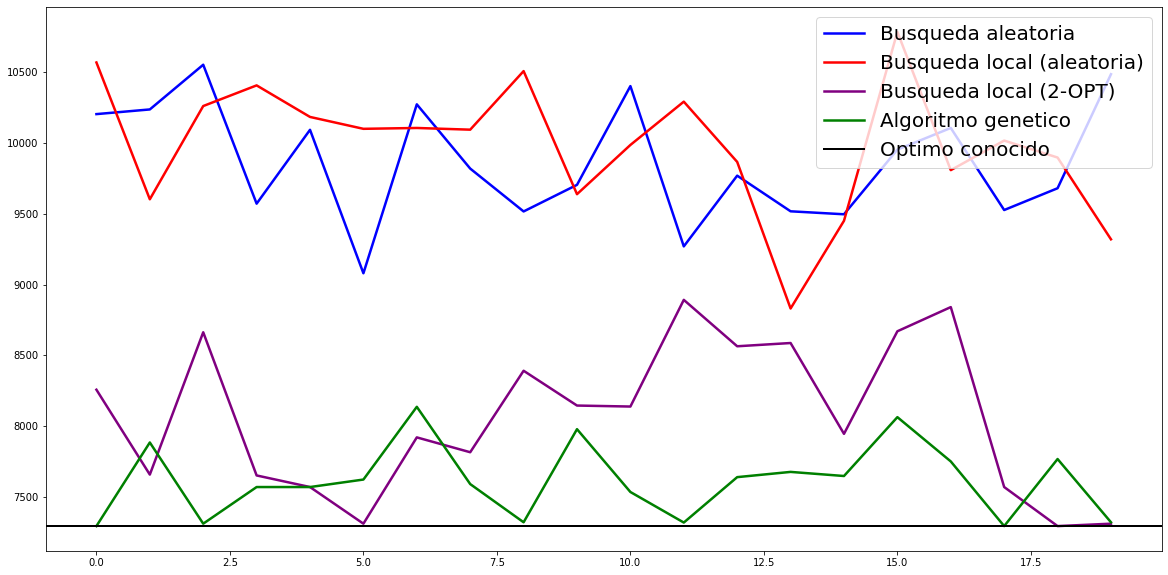

In [ ]:
plot_results(random_search, 'Busqueda aleatoria', cant_experiments, 'blue')
plot_results(local_search, 'Busqueda local (aleatoria)', cant_experiments, 'red')
plot_results(ls_2opt, 'Busqueda local (2-OPT)', cant_experiments, 'purple')
plot_results(ga, 'Algoritmo genetico', cant_experiments, 'green')


plt.axhline(tsp_13['OptDistanceKnow'], 0, cant_experiments, label='Optimo conocido', color="black", linewidth=2.0)
plt.legend(loc='upper right', prop={'size': 20})
plt.show()

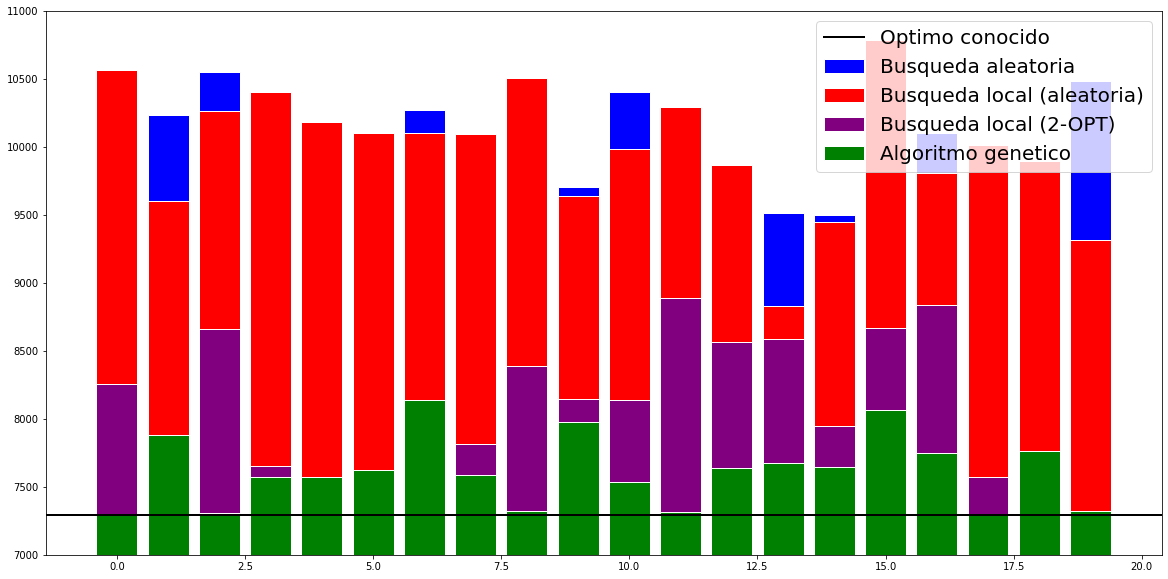

In [ ]:
plot_results(random_search, 'Busqueda aleatoria', cant_experiments, 'blue', type_graph='bar')
plot_results(local_search, 'Busqueda local (aleatoria)', cant_experiments, 'red', type_graph='bar')
plot_results(ls_2opt, 'Busqueda local (2-OPT)', cant_experiments, 'purple', type_graph='bar')
plot_results(ga, 'Algoritmo genetico', cant_experiments, 'green', type_graph='bar')

plt.axhline(tsp_13['OptDistanceKnow'], 0, cant_experiments, label='Optimo conocido', color="black", linewidth=2.0)
plt.ylim(7000, 11000)
plt.legend(loc='upper right', prop={'size': 20})
plt.show()

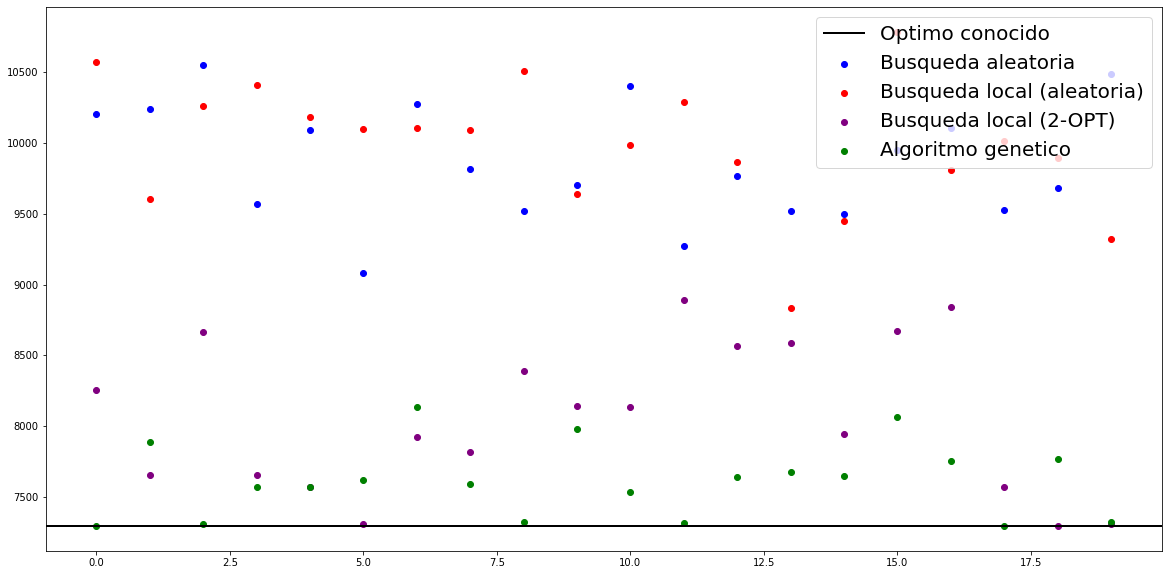

In [ ]:
plot_results(random_search, 'Busqueda aleatoria', cant_experiments, 'blue', type_graph='scatter')
plot_results(local_search, 'Busqueda local (aleatoria)', cant_experiments, 'red', type_graph='scatter')
plot_results(ls_2opt, 'Busqueda local (2-OPT)', cant_experiments, 'purple', type_graph='scatter')
plot_results(ga, 'Algoritmo genetico', cant_experiments, 'green', type_graph='scatter')

plt.axhline(tsp_13['OptDistanceKnow'], 0, cant_experiments, label='Optimo conocido', color="black", linewidth=2.0)
plt.legend(loc='upper right', prop={'size': 20})
plt.show()

### Comparando la cantidad de generaciones

In [ ]:
n_generations_list = np.linspace(10, 500, dtype=int)

random_search_g = []
local_search_g = []
ls_2opt_g = []
ga_g = []

for n_gen in n_generations_list:
  random_search_g.append(run_random_search(30, n_gen)[1])
  local_search_g.append(run_local_search(30, n_gen)[1])
  ls_2opt_g.append(run_LS(n_gen)[1])
  ga_g.append(run_genetic_algorithm(30, n_gen, 0.7, 0.3)[1])

In [ ]:
show_results(random_search_g, 'Busqueda aleatoria')
show_results(local_search_g, 'Busqueda local (aleatoria)')
show_results(ls_2opt_g, 'Busqueda local (2-OPT)')
show_results(ga_g, 'Algoritmo genetico')

Busqueda aleatoria            :  Promedio:  9240.18  - Minimo:  8048  - Maximo:  10635
Busqueda local (aleatoria)    :  Promedio:  9282.48  - Minimo:  8048  - Maximo:  11100
Busqueda local (2-OPT)        :  Promedio:  7733.2  - Minimo:  7293  - Maximo:  8841
Algoritmo genetico            :  Promedio:  7495.9  - Minimo:  7293  - Maximo:  8926


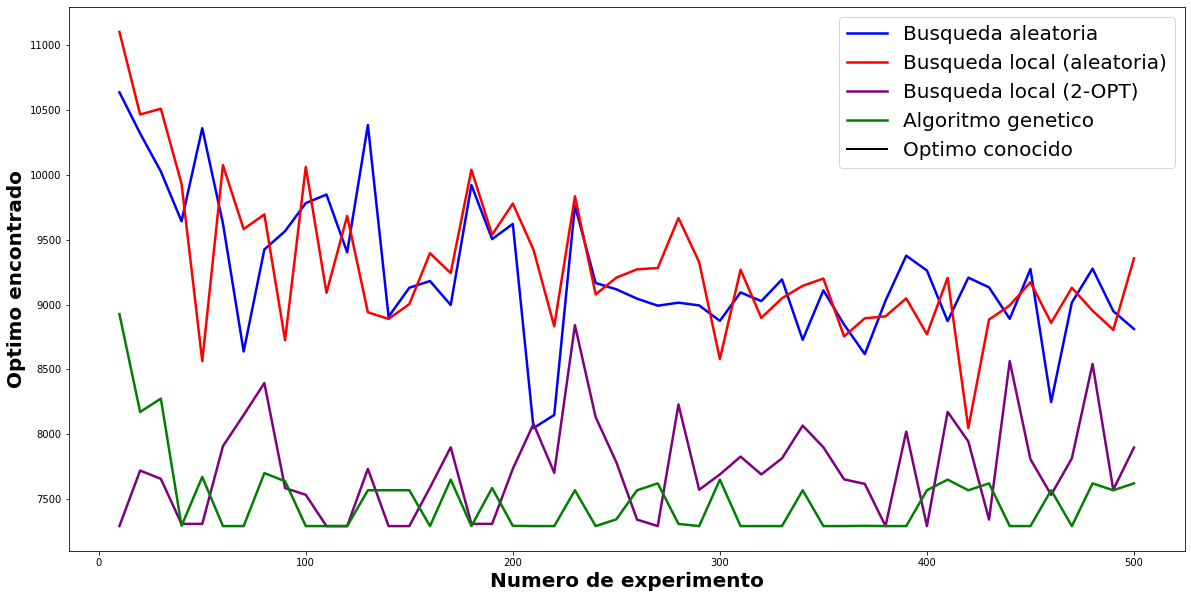

In [ ]:
plot_generations(random_search_g, 'Busqueda aleatoria', n_generations_list, 'blue')
plot_generations(local_search_g, 'Busqueda local (aleatoria)', n_generations_list, 'red')
plot_generations(ls_2opt_g, 'Busqueda local (2-OPT)', n_generations_list, 'purple')
plot_generations(ga_g, 'Algoritmo genetico', n_generations_list, 'green')


plt.axhline(tsp_13['OptDistanceKnow'], 10, 500, label='Optimo conocido', color="black", linewidth=2.0)
plt.legend(loc='upper right', prop={'size': 20})
plt.xlabel("Numero de experimento", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'black'})
plt.ylabel("Optimo encontrado", fontdict={'fontsize': 20, 'fontweight':'bold', 'color':'black'})
plt.show()